In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import scipy.stats as sc
%matplotlib inline
import Jared_function as ai

# A

#### i

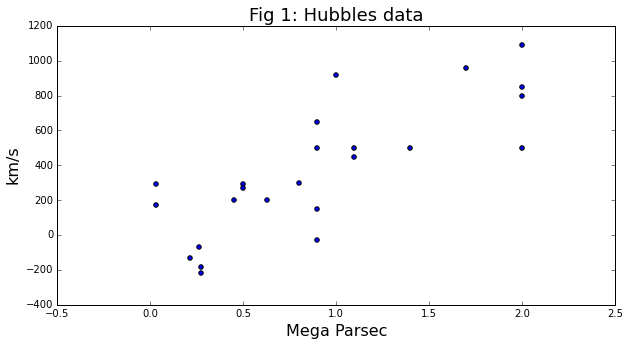


Pause



In [2]:
data = np.genfromtxt('hubbleoriginal.csv' ,dtype=float,delimiter=',',skip_header=1)
MPC = data[:,1] #distances
KMS = data[:,2] #velocties
plt.figure(figsize=(10,5))
plt.scatter(MPC,KMS)
ai.figName('Fig 1: Hubbles data','Mega Parsec','km/s')
plt.show()
ai.pause()

#### ii

454.158440923


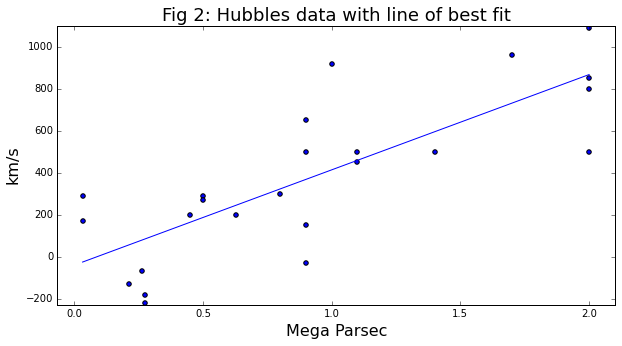


Pause



In [3]:
sigma = np.ones(24)
a, b, sigmaA, sigmaB= ai.leastSquare(MPC, KMS,sigma) #least squares equation
ls = b * MPC + a #line of best fit
print b
#
plt.figure(figsize=(10,5))
plt.scatter(MPC,KMS)
plt.plot(MPC,ls,'b-')
plt.xlim(np.min(MPC)-.1,np.max(MPC)+.1)
plt.ylim(np.min(KMS)-10 ,np.max(KMS) +10)
ai.figName('Fig 2: Hubbles data with line of best fit','Mega Parsec','km/s')
plt.show()
ai.pause()

#### iii

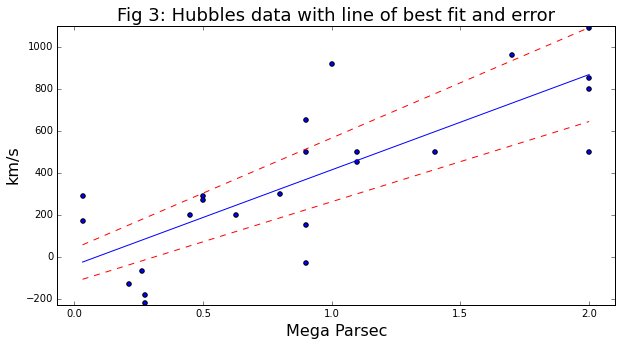


Pause



In [7]:
ajustment = b * MPC + a #data ajustment
sigma = np.ones(24) * np.sqrt(sc.moment(KMS - ajustment,2)) #the new error
a1, b1, sigmaA, sigmaB = ai.leastSquare(MPC, KMS,sigma)
ls1 = (b + sigmaB) * MPC + (a + sigmaA) #error lines
ls2 = (b - sigmaB) * MPC + (a - sigmaA)
#
plt.figure(figsize=(10,5))
plt.scatter(MPC,KMS)
plt.plot(MPC,ls,'b-')
plt.plot(MPC,ls1,'r--')
plt.plot(MPC,ls2,'r--')
plt.xlim(np.min(MPC)-.1,np.max(MPC)+.1)
plt.ylim(np.min(KMS)-10,np.max(KMS) +10)
ai.figName('Fig 3: Hubbles data with line of best fit and error','Mega Parsec','km/s')
plt.show()
ai.pause()

#### iv

In [8]:
chi = ai.chiLLS(MPC,KMS,a,b) #the chi squared value
P=1 - sc.chi2.cdf(chi,len(MPC)-2)
print 'chi:',chi
print 'probablity',P

chi: 24.0
probablity 0.347229417554


In [9]:
print 'pearsons:',sc.pearsonr(MPC,KMS)[0]
ai.pause()

pearsons: 0.789639487935

Pause



# B

#### i and ii

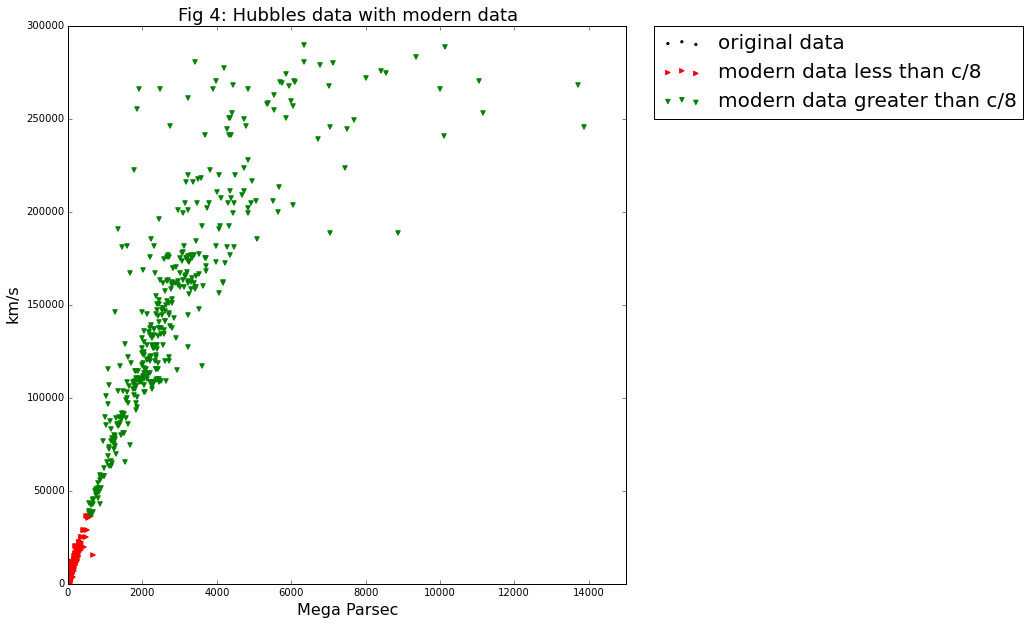


Pause



In [4]:
data = np.genfromtxt('ned1dlevel5.csv' ,dtype=float,delimiter=',',skip_header=2)
MPC1 = data[:,3] #distance
KMS1 = data[:,11] #veloctiy
#
data = np.genfromtxt('ned4dlevel5.csv' ,dtype=float,delimiter=',',skip_header=2)
MPC2 = data[:,3] #distance
KMS2 = data[:,10] #velocity
#
plt.figure(figsize=(10,10))
plt.scatter(MPC,KMS, marker = '.', label ='original data')
plt.scatter(MPC1,KMS1, marker = '>', color = 'r', label ='modern data less than c/8')
plt.scatter(MPC2,KMS2, marker = 'v', color = 'g', label ='modern data greater than c/8')
ai.figName('Fig 4: Hubbles data with modern data','Mega Parsec','km/s')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':20})
plt.xlim(0,15000)
plt.ylim(0,3e5)
plt.show()
ai.pause()

#### iii

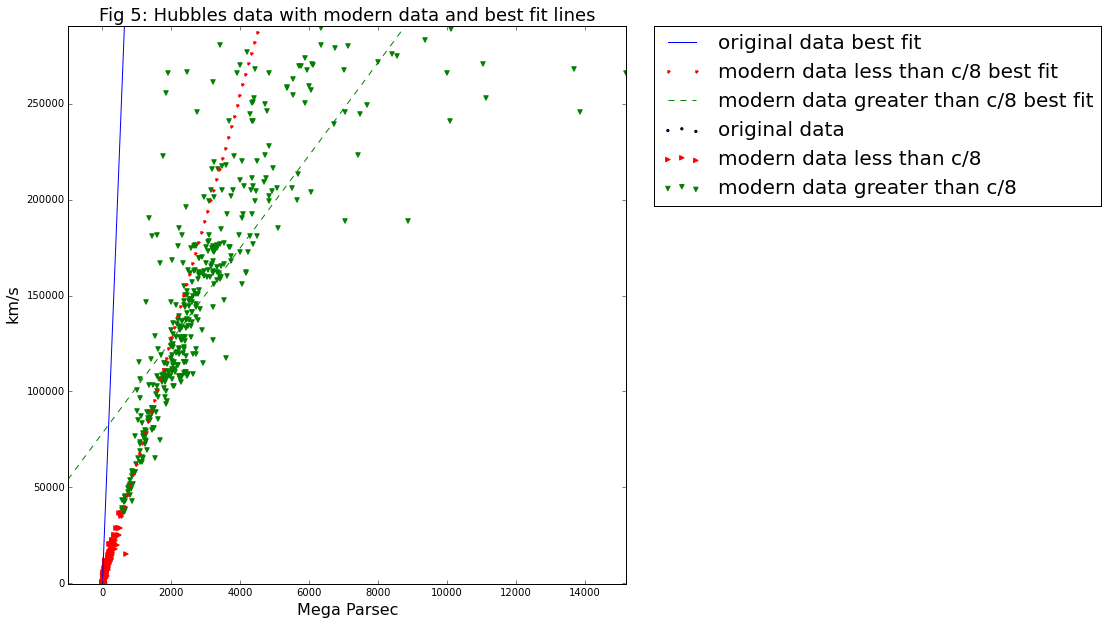


Pause



In [11]:
sigma = np.ones(24)
a, b, sigmaA, sigmaB= ai.leastSquare(MPC, KMS,sigma) #line of best fit
x = np.linspace(-100,1000,10)
ls = b * x + a
#
sigma = np.ones(len(MPC1))
a1, b1, sigmaA1, sigmaB1= ai.leastSquare(MPC1, KMS1,sigma) #line of best fit
y = np.linspace(-1000,7500,100)
ls1 = b1 * y + a1
#
sigma = np.ones(len(MPC2))
a2, b2, sigmaA2, sigmaB2= ai.leastSquare(MPC2, KMS2,sigma) #line of best fit
z = np.linspace(-1000,15000,20)
ls2 = b2 * z + a2
#
plt.figure(figsize=(10,10))
plt.plot(x,ls,'b-', label = 'original data best fit')
plt.plot(y,ls1,'r.', label = 'modern data less than c/8 best fit')
plt.plot(z,ls2,'g--', label = 'modern data greater than c/8 best fit')
plt.scatter(MPC,KMS, marker = '.', label ='original data')
plt.scatter(MPC1,KMS1, marker = '>', color = 'r', label ='modern data less than c/8')
plt.scatter(MPC2,KMS2, marker = 'v', color = 'g', label ='modern data greater than c/8')
ai.figName('Fig 5: Hubbles data with modern data and best fit lines','Mega Parsec','km/s')
plt.xlim(np.min(MPC)-1000,np.max(MPC2))
plt.ylim(np.min(KMS),np.max(KMS2)+1000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
plt.show()
ai.pause()

#### iv and v

In [7]:
z, v = ai.red2Velocity(KMS) #redshift value an effective velocity
z1, v1 = ai.red2Velocity(KMS1)
z2, v2 =ai.red2Velocity(KMS2)
sigma=np.ones(24)
a, b, sigmaA, sigmaB = ai.leastSquare(MPC,v,sigma)
x = np.linspace(0,15000,20)
ls = b * x + a

sigma=np.ones(len(MPC1))
a1, b1, sigmaA1, sigmaB1 = ai.leastSquare(MPC1,v1,sigma)
y=np.linspace(0,15000,20)
ls1 = b1 * y + a1

sigma=np.ones(len(MPC2))
a2, b2, sigmaA2, sigmaB2 = ai.leastSquare(MPC2,v2,sigma)
z=np.linspace(0,15000,20)
ls2 = b2 * z + a2
print b1

66.4161660641


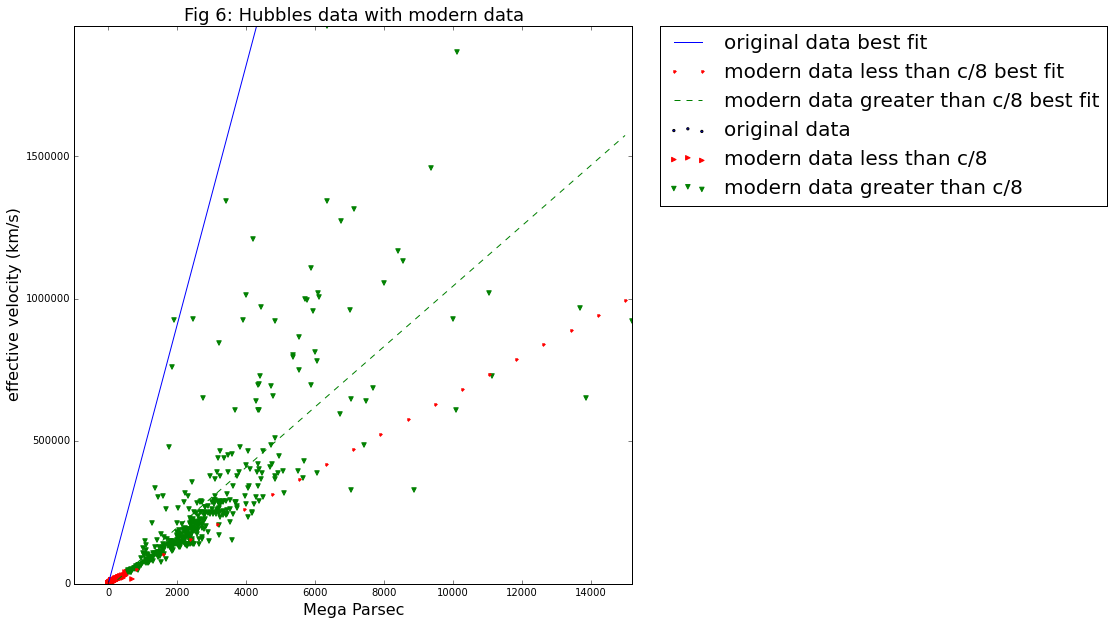


Pause



In [13]:
plt.figure(figsize=(10,10))
plt.scatter(MPC,v, marker = '.', label ='original data')
plt.scatter(MPC1,v1, marker = '>', color = 'r', label ='modern data less than c/8')
plt.scatter(MPC2,v2, marker = 'v', color = 'g', label ='modern data greater than c/8')
plt.plot(x,ls,'b-', label = 'original data best fit')
plt.plot(y,ls1,'r.', label = 'modern data less than c/8 best fit')
plt.plot(z,ls2,'g--', label = 'modern data greater than c/8 best fit')
ai.figName('Fig 6: Hubbles data with modern data','Mega Parsec','effective velocity (km/s)')
plt.ylim(-1000,np.max(v2))
plt.xlim(-1000,np.max(MPC2))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
plt.show()
ai.pause()

#### vi and vii

In [14]:
chi = ai.chiLLS(MPC,KMS,a,b)
P=1 - sc.chi2.cdf(chi,len(MPC)-2)
print 'chi hubbles original:',chi
print 'probablity hubbles original:',P
print 'pearsons hubbles original', sc.pearsonr(MPC,KMS)[0]

chi hubbles original: 24.000099196
probablity hubbles original: 0.347224217855
pearsons hubbles original 0.789639487935


In [15]:
chi1 = ai.chiLLS(MPC1,KMS1,a1,b1)
P1=1 - sc.chi2.cdf(chi1,len(MPC1)-2)
print 'chi moddern less than c/8:',chi1
print 'probablity moddern less than c/8:',P1
print 'pearsons modern less than c/8', sc.pearsonr(MPC1,KMS1)[0]

chi moddern less than c/8: 3650.56050445
probablity moddern less than c/8: 0.466285679692
pearsons modern less than c/8 0.969647246847


In [17]:
chi2 = ai.chiLLS(MPC2,KMS2,a2,b2)
P2= 1 - sc.chi2.cdf(chi2,len(MPC2)-2)
print 'chi moddern greater than c/8:',chi2
print 'probablity moddern greater than c/8:',P2
print 'pearsons modern greater than c/8', sc.pearsonr(MPC2,KMS2)[0]
ai.pause()

chi moddern greater than c/8: 695.76876551
probablity moddern greater than c/8: 0.0
pearsons modern greater than c/8 0.791054225729

Pause



#### viii

In [18]:
KMSC = np.concatenate((KMS1,KMS2))
MPCC = np.concatenate((MPC1,MPC2))
z3, v3 =ai.red2Velocity(KMSC)
sigma=np.ones(len(MPCC))
a3, b3, sigmaA3, sigmaB3 = ai.leastSquare(MPCC,v3,sigma)
X = np.linspace(0,15000,20)
ls3 = b3 * X + a3

102.65390854


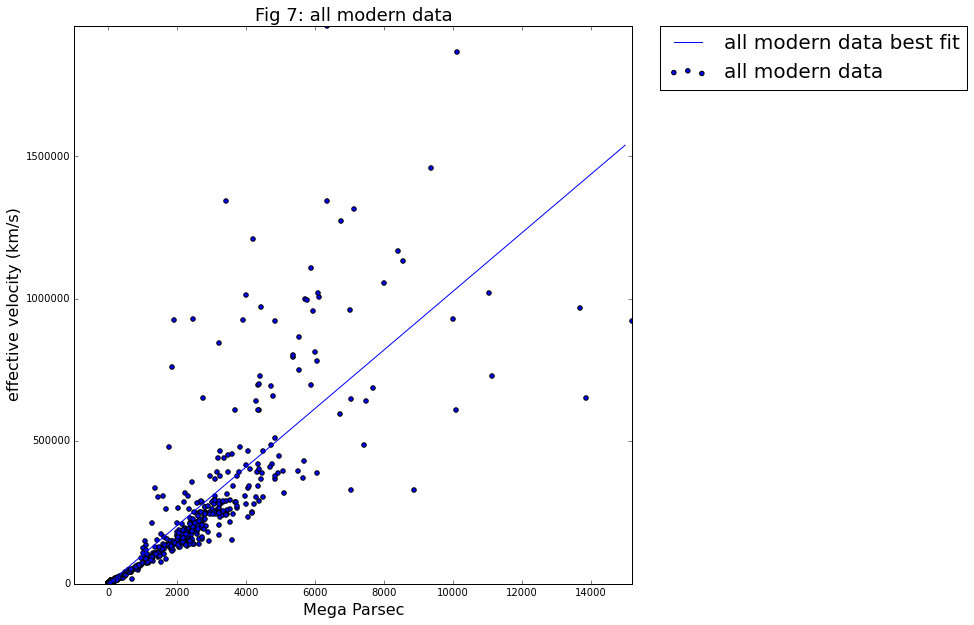


Pause



In [19]:
plt.figure(figsize=(10,10))
print b3
plt.scatter(MPCC,v3, label ='all modern data')
plt.plot(X,ls3,'b-', label = 'all modern data best fit')
ai.figName('Fig 7: all modern data','Mega Parsec','effective velocity (km/s)')
plt.ylim(-1000,np.max(v2))
plt.xlim(-1000,np.max(MPC2))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
plt.show()
ai.pause()

In [16]:
chi3 = ai.chiLLS(MPCC,KMSC,a3,b3)
P3=1 - sc.chi2.cdf(chi2,len(MPCC)-2)
print 'chi all modern data:',chi3
print 'probablity all modern data:',P3
print 'pearsons all modern data', sc.pearsonr(MPCC,KMSC)[0]
ai.pause()

chi all modern data: 4220.46285176
probablity all modern data: 1.0
pearsons all modern data 0.927733775867


#### ix

In [20]:
MPC2o = np.sort(MPC2)
KMS2o = np.sort(KMS2)
MPC2o1 = MPC2o[:24]
KMS2o1 = KMS2o[:24]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o1,2))
a4, b4, sigmaA4, sigmaB4 = ai.leastSquare(MPC2o1,KMS2o1,sigma)
MPC2o2 = MPC2o[24:48]
KMS2o2 = KMS2o[24:48]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o2,2))
a5, b5, sigmaA5, sigmaB5 = ai.leastSquare(MPC2o2,KMS2o2,sigma)
MPC2o3 = MPC2o[48:72]
KMS2o3 = KMS2o[48:72]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o3,2))
a6, b6, sigmaA6, sigmaB6 = ai.leastSquare(MPC2o3,KMS2o3,sigma)
MPC2o4 = MPC2o[72:96]
KMS2o4 = KMS2o[72:96]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o4,2))
a7, b7, sigmaA7, sigmaB7 = ai.leastSquare(MPC2o4,KMS2o4,sigma)
MPC2o5 = MPC2o[96:120]
KMS2o5 = KMS2o[96:120]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o5,2))
a8, b8, sigmaA8, sigmaB8 = ai.leastSquare(MPC2o5,KMS2o5,sigma)
MPC2o6 = MPC2o[120:144]
KMS2o6 = KMS2o[120:144]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o6,2))
a9, b9, sigmaA9, sigmaB9 = ai.leastSquare(MPC2o6,KMS2o6,sigma)
MPC2o7 = MPC2o[144:168]
KMS2o7 = KMS2o[144:168]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o7,2))
a10, b10, sigmaA10, sigmaB10 = ai.leastSquare(MPC2o7,KMS2o7,sigma)
MPC2o8 = MPC2o[168:192]
KMS2o8 = KMS2o[168:192]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o8,2))
a11, b11, sigmaA11, sigmaB11 = ai.leastSquare(MPC2o8,KMS2o8,sigma)
MPC2o9 = MPC2o[192:216]
KMS2o9 = KMS2o[192:216]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o9,2))
a12, b12, sigmaA12, sigmaB12 = ai.leastSquare(MPC2o9,KMS2o9,sigma)
MPC2o10 = MPC2o[216:240]
KMS2o10 = KMS2o[216:240]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o10,2))
a13, b13, sigmaA13, sigmaB13 = ai.leastSquare(MPC2o10,KMS2o10,sigma)
MPC2o11 = MPC2o[240:264]
KMS2o11 = KMS2o[240:264]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o11,2))
a14, b14, sigmaA14, sigmaB14 = ai.leastSquare(MPC2o11,KMS2o11,sigma)
MPC2o12 = MPC2o[264:288]
KMS2o12 = KMS2o[264:288]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o12,2))
a15, b15, sigmaA15, sigmaB15 = ai.leastSquare(MPC2o12,KMS2o12,sigma)
MPC2o13 = MPC2o[288:312]
KMS2o13 = KMS2o[288:312]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o13,2))
a16, b16, sigmaA16, sigmaB16 = ai.leastSquare(MPC2o13,KMS2o13,sigma)
MPC2o14 = MPC2o[312:336]
KMS2o14 = KMS2o[312:336]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o14,2))
a17, b17, sigmaA17, sigmaB17 = ai.leastSquare(MPC2o14,KMS2o14,sigma)
MPC2o15 = MPC2o[336:360]
KMS2o15 = KMS2o[336:360]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o15,2))
a18, b18, sigmaA18, sigmaB18 = ai.leastSquare(MPC2o15,KMS2o15,sigma)
MPC2o16 = MPC2o[360:384]
KMS2o16 = KMS2o[360:384]
sigma = np.ones(len(MPC2o1)) * np.sqrt(sc.moment(KMS2o16,2))
a19, b19, sigmaA19, sigmaB19 = ai.leastSquare(MPC2o16,KMS2o16,sigma)
MPC2o17 = MPC2o[384:]
KMS2o17 = KMS2o[384:]
sigma = np.ones(len(MPC2o17)) * np.sqrt(sc.moment(KMS2o17,2))
a20, b20, sigmaA20, sigmaB20 = ai.leastSquare(MPC2o17,KMS2o17,sigma)

A = [a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20]
B = [b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20]
A = np.average(A)
B = np.average(B)
Y = np.linspace(0,15000)
ls4 = B * Y + A
print B

41.4119399425


(0, 15200.0)

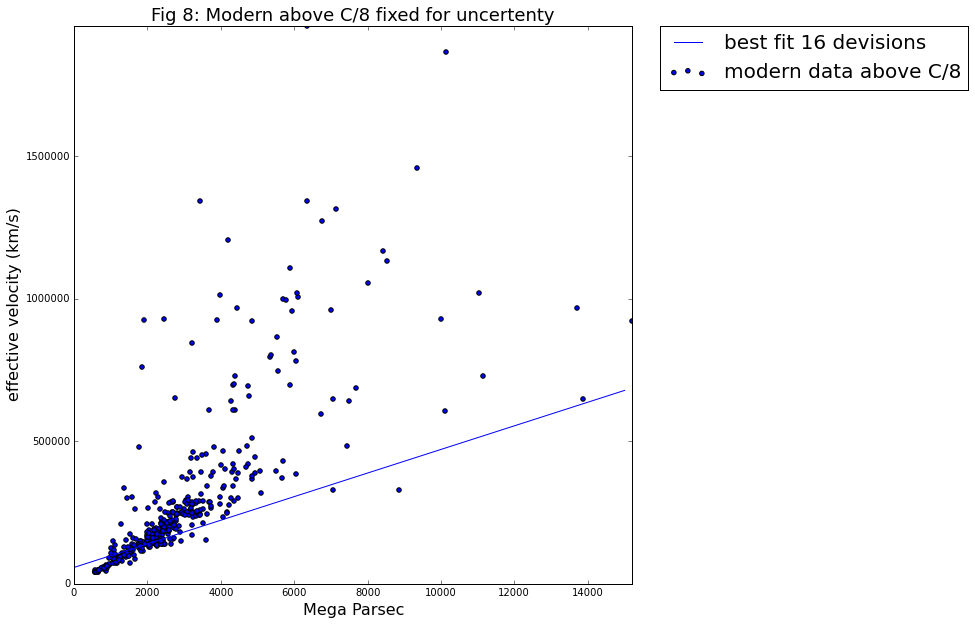

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(MPC2,v2, label ='modern data above C/8')
plt.plot(Y,ls4,'b-', label = 'best fit 16 devisions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
ai.figName('Fig 8: Modern above C/8 fixed for uncertenty','Mega Parsec','effective velocity (km/s)')
plt.ylim(0,np.max(v2))
plt.xlim(0,np.max(MPC2))
ai.pause()

#### x

In [27]:
data = np.genfromtxt('ned1dlevel5.csv' ,dtype=str,delimiter=',',skip_header=2)
supernova1_p = np.array([])
supernova1_v = np.array([])
for n in range(len(MPC1)):
    if data[:,4][n] == 'SNIa':
        supernova1_p = np.append(supernova1_p, MPC1[n])
        supernova1_v = np.append(supernova1_v, KMS1[n])
data = np.genfromtxt('ned4dlevel5.csv' ,dtype=str,delimiter=',',skip_header=2)
supernova2_p = np.array([])
supernova2_v = np.array([])
for n in range(len(MPC2)):
    if data[:,4][n] == 'SNIa':
        supernova2_p = np.append(supernova2_p, MPC1[n])
        supernova2_v = np.append(supernova2_v, KMS1[n])

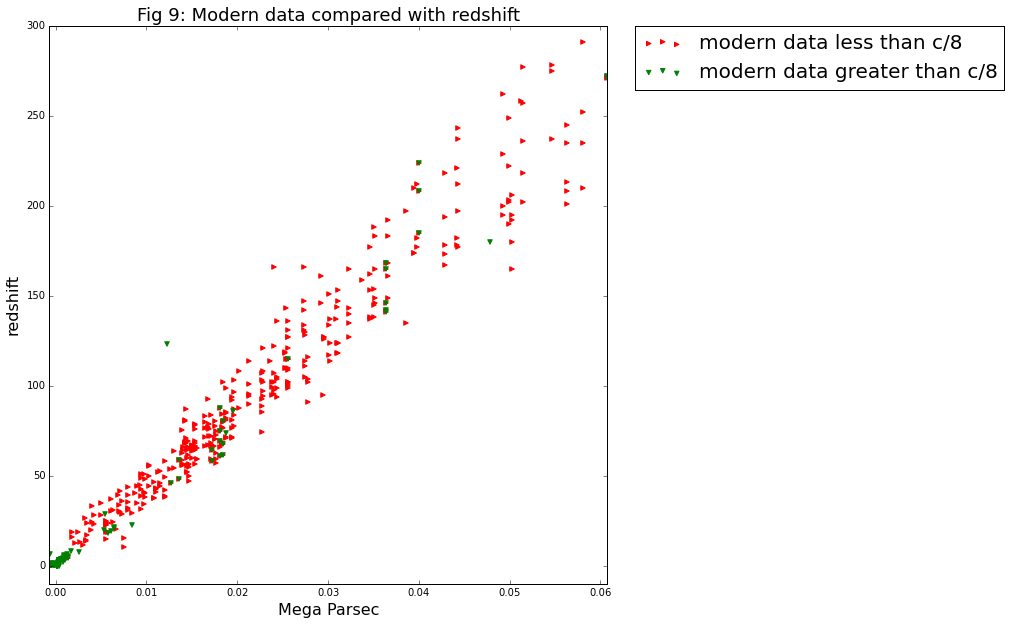

In [28]:
z3 = ai.red2Velocity(supernova1_v)[0]
z4 = ai.red2Velocity(supernova2_v)[0]
#
plt.figure(figsize=(10,10))
plt.scatter(z3,supernova1_p, marker = '>', color = 'r', label ='modern data less than c/8')
plt.scatter(z4,supernova2_p, marker = 'v', color = 'g', label ='modern data greater than c/8')
plt.xlim(np.min(z4), np.max(z4))
plt.ylim(-10,300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
ai.figName('Fig 9: Modern data compared with redshift','Mega Parsec','redshift')
plt.show()
ai.pause()

# C

#### i and ii

In [20]:
data = np.genfromtxt('hubbleoriginal.csv' ,dtype=float,delimiter=',',skip_header=1)
RA = data[:,3] * np.pi / 12
DEC = data[:,4] * np.pi / 180
ai.pause()


Pause



#### iii

In [21]:
sigma = np.ones(24)
H,X,Y,Z = ai.MLinearLeastSquare(MPC,RA, DEC, KMS, sigma) #least squares ajusted for rotation

465.222713404


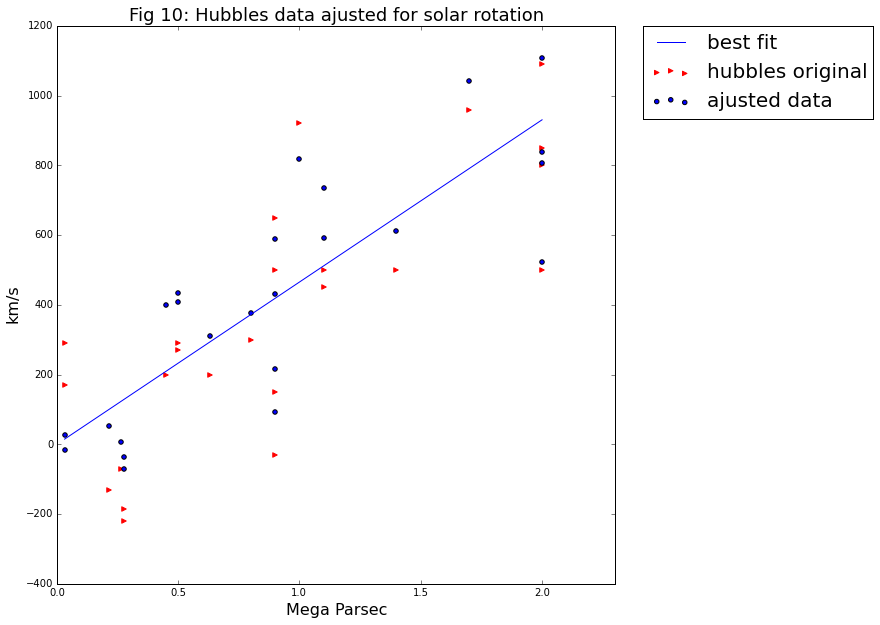


Pause



In [22]:
off = X*np.cos(RA)*np.cos(DEC) + Y*np.sin(RA)*np.cos(DEC) + Z*np.sin(DEC) #off set of the data
lls = H*MPC
print H
#
plt.figure(figsize=(10,10))
plt.scatter(MPC,KMS,marker = '>', color = 'r',label = 'hubbles original')
plt.scatter(MPC,KMS-off,label='ajusted data')
plt.plot(MPC,lls,label='best fit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':20})
ai.figName('Fig 10: Hubbles data ajusted for solar rotation','Mega Parsec','km/s')
plt.xlim(0,2.3)
plt.show()
ai.pause()

#### iv

In [41]:
chi = ai.chiLLS(MPC,KMS-off,0,H) #the chi squared value
P=1 - sc.chi2.cdf(chi,len(MPC)-2)
print 'chi:',chi
print 'probablity',P

chi: 24.0162550076
probablity 0.346377929844
